### imports

In [1]:
import sys
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho da pasta "Twitch"
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar as pasta ao sys.path
visualization_dir = base_dir / 'src' / 'visualization'
getData_dir = base_dir / 'src' / 'data'
sys.path.append(str(visualization_dir))
sys.path.append(str(getData_dir))

# Importar os módulos
try:
    import community_visualization
    import correlations
    import TwitchGraphs
    import TwitchVisualization
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

# Paises
countries = ["PTBR", "DE", "ENGB", "ES", "FR", "RU"]

## Visualização de gráficos

### Definir parâmetros

#### Definir o diretório correto

#### Selecionar o País

In [2]:
# Escolher entre: DE, ENGB, ES, FR, PTBR, RU
country = "ENGB"

#### Variáveis Extras

In [3]:
# Definir o nome das ficheiros originais
Filedges = "musae_" + country + "_edges.csv"
Filetarget = "musae_" + country + "_target.csv"

# Definir o diretório dos ficheiros originais
edgePath = base_dir / 'data' / country / Filedges
targetPath = base_dir / 'data' / country / Filetarget

# Definir o diretório dos ficheiros tratados e do local das imagens
csv_path = base_dir / 'data' / country / f"twitch_network_metrics_{country}.csv"
output_dir = base_dir / 'docs' / "Imagens"

# Ler o ficheiro CSV
df = pd.read_csv(csv_path)
df

node  degree  degree_centrality  closeness_centrality  \
0     1773     720           0.101053              0.408872   
1     4949     691           0.096982              0.416350   
2     3401     465           0.065263              0.398579   
3     6136     378           0.053053              0.361528   
4      166     352           0.049404              0.354319   
...    ...     ...                ...                   ...   
7121  1220       1           0.000140              0.212629   
7122   445       1           0.000140              0.223656   
7123  6085       1           0.000140              0.251616   
7124  4412       1           0.000140              0.240336   
7125   870       1           0.000140              0.223005   

      betweenness_centrality  eigenvector_centrality  community_leiden  \
0                   0.126767                0.236331                 3   
1                   0.118173                0.276614                 5   
2                   0.067318                0.158004                 0   
3                   0.037370                0.110998                 0   
4                   0.036716                0.075688                 2   
...                      ...                     ...               ...   
7121                0.000000                0.000028                 3   
7122                0.000000                0.000162                 2   
7123                0.000000                0.000632                 4   
7124                0.000000                0.000305                 7   
7125                0.000000                0.000052                 1   

          views  partner  mature  days  clustering_coef  
0      89506813     True   False  2784         0.003647  
1      46682923     True   False  2632         0.006384  
2      20253246     True    True  2959         0.007731  
3     178500544     True   False  2443         0.003888  
4      20516537     True   False  1736         0.018470  
...         ...      ...     ...   ...              ...  
7121         49    False   False  1234         0.000000  
7122        210    False   False  1692         0.000000  
7123       1391    False   False  1067         0.000000  
7124      16131    False    True  1016         0.000000  
7125       4929    False    True  1856         0.000000  

[7126 rows x 12 columns]

#### Configurar o estilo dos gráficos

In [4]:
# Configuração de estilo dos gráficos
plt.style.use('dark_background')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Visualização dos Grafos

Número de nós: 7126
Número de arestas: 35324


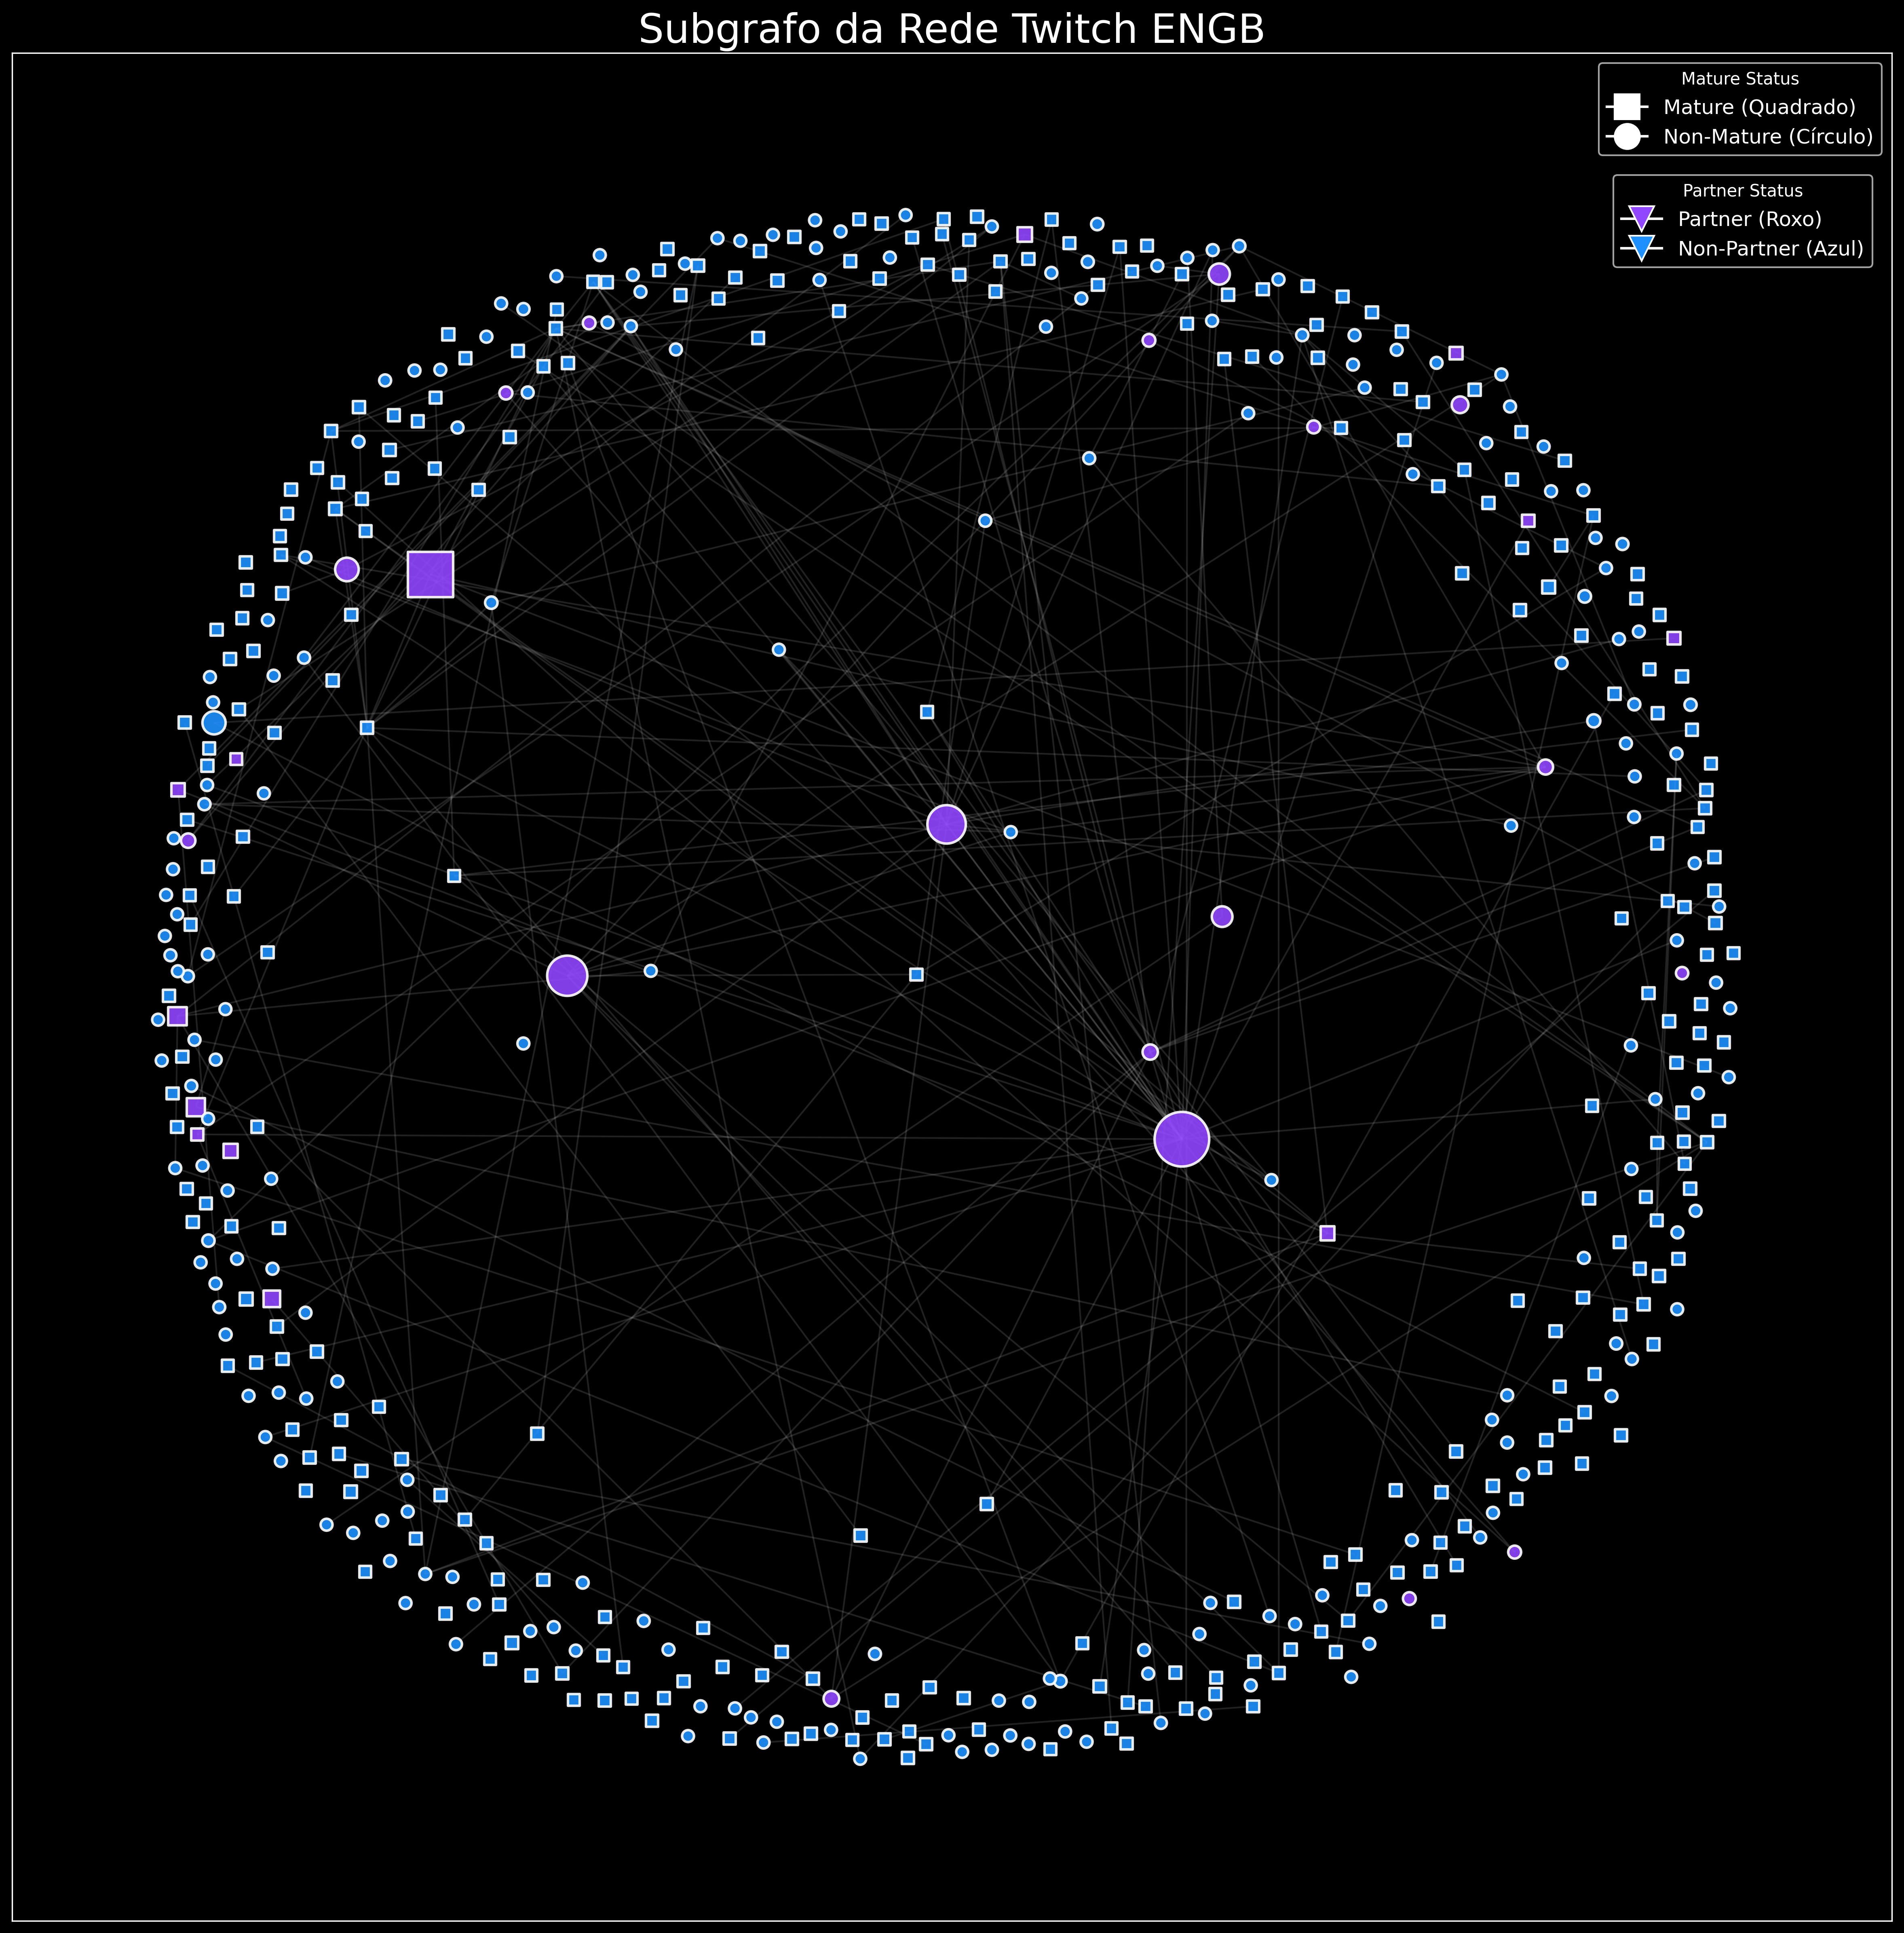

In [5]:
# Definir a percentagem de nós do grafo a utilizar
PercNodes = 7

TwitchVisualization.seeGraph(base_dir, edgePath, targetPath, PercNodes, country)

### Histograma das Variáveis

In [6]:
output_dir_hist = base_dir / 'docs' / "Imagens"
hist_folder = TwitchGraphs.create_subfolder('Histograms', output_dir_hist)

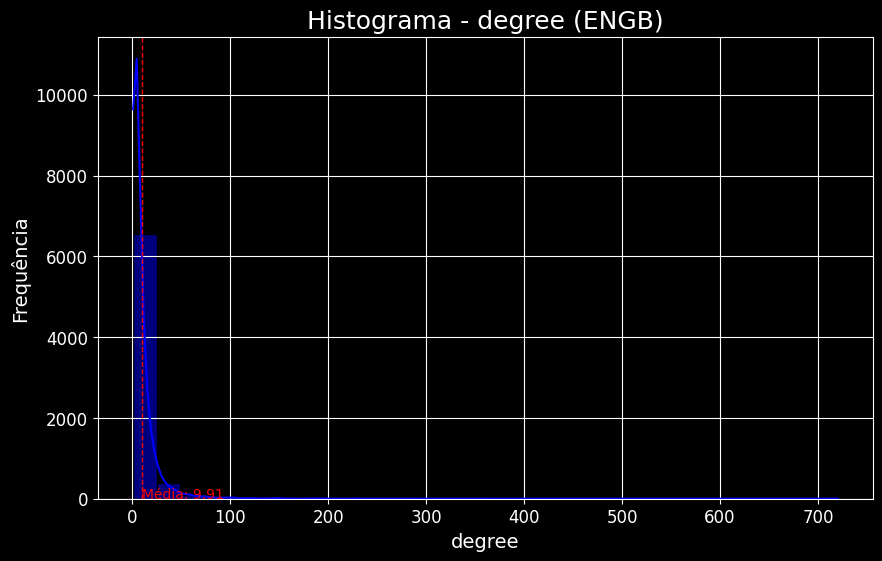

In [7]:
TwitchGraphs.plot_histogram(df = df, column_name = 'degree', color = 'blue', country = country, output_dir = output_dir_hist)

### PieChart das variáveis

In [8]:
output_dir_pie = base_dir / 'docs' / "Imagens"
piechart_folder = TwitchGraphs.create_subfolder('PieCharts', output_dir)

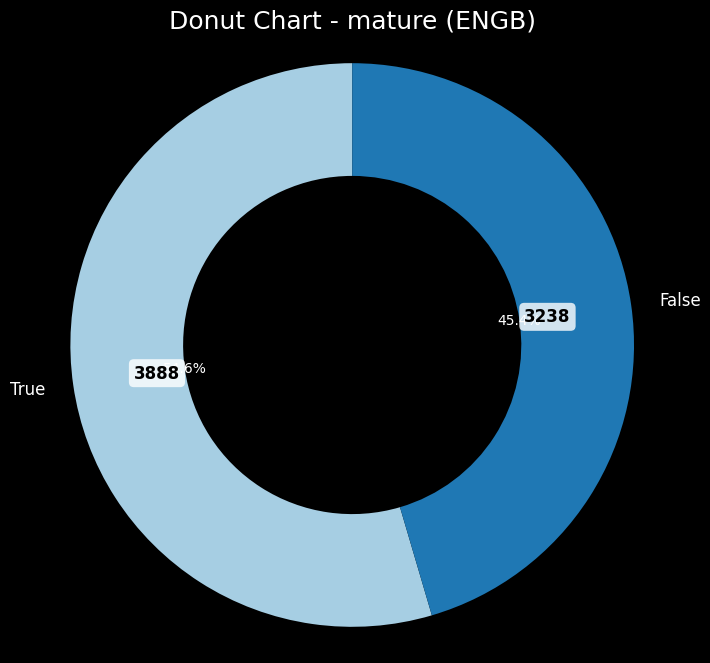

In [9]:
TwitchGraphs.plot_pie_chart(df = df, column_name = 'mature', country = country, output_dir = output_dir)

### Correlações

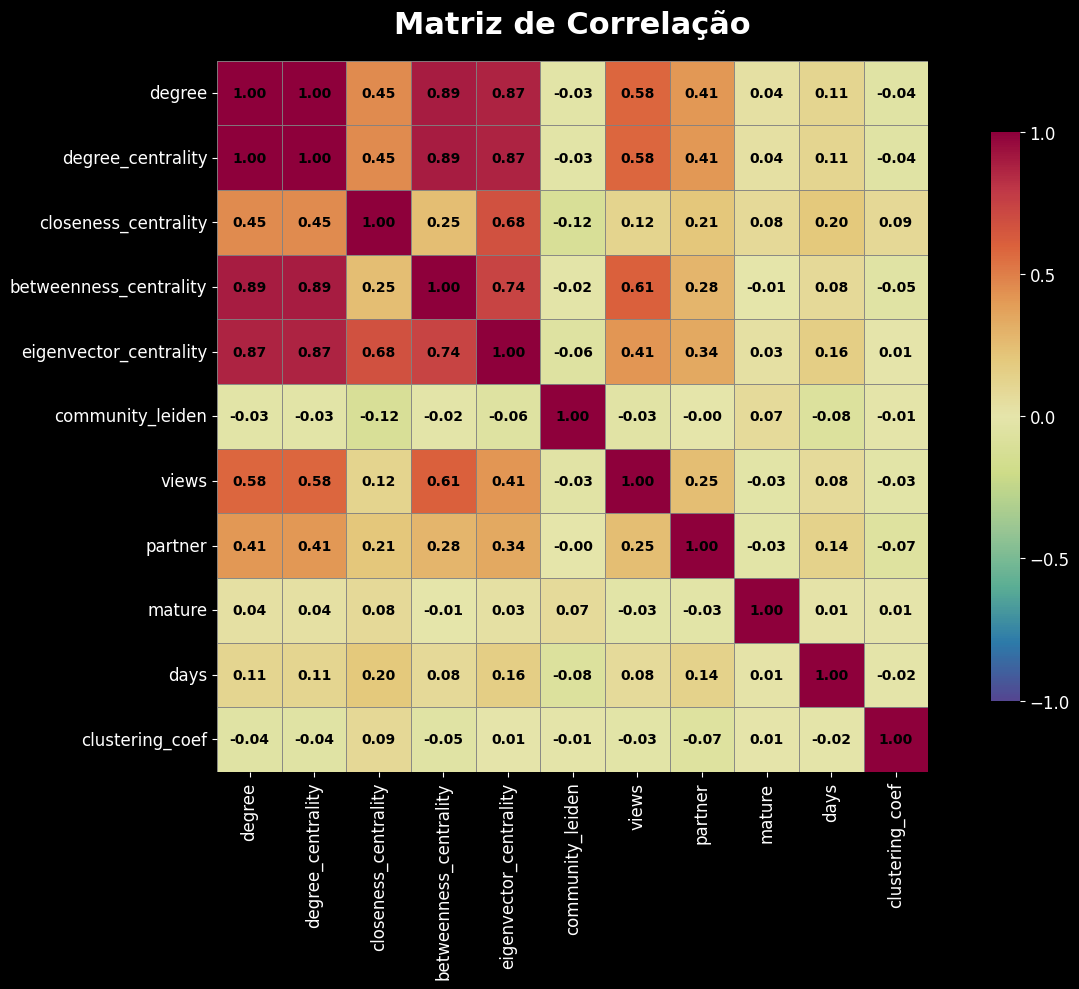

Imagem salva em: C:\Users\diogo\Desktop\ARA\Projeto\Twitch\docs\Imagens\CorrPlot\matriz_correlacao_ENGB.png


In [10]:
correlations.get_correlations(country)